In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sess = tf.InteractiveSession()

# plotly (interactive plot)
from plotly.offline import init_notebook_mode, iplot
import plotly.plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import math

In [2]:
w1 = 1
w2 = -2.5
bias = 2

num_data = 100
mid_data = math.floor(num_data/2)
min_value = 1
max_value = 4000
threshold = -2000.00

,a,b,y
0,2733.0,905.626162,1.0
1,2608.0,1741.955189,1.0
2,1654.0,1253.523244,1.0
3,3265.0,1945.490482,1.0
4,836.0,482.091675,1.0


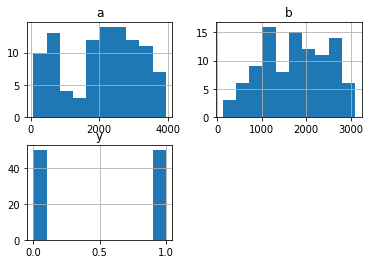

In [3]:
np.random.seed(0)

a = np.random.randint(low=min_value, high=max_value, size=[num_data])

b1 = ((threshold - w1*a[: mid_data] - bias) / w2)
b1 = b1 - np.random.rand(b1.shape[0])*1000

b2 = ((threshold - w1*a[mid_data :] - bias) / w2)
b2 = b2 + np.random.rand(b2.shape[0])*1000
b = np.concatenate((b1,b2))
X = np.array([a,b]).T

def convertToBinary(input) :
    if input>threshold:
        return 1
    else:
        return 0
# gen output
y = []
actual_y = []
for i in range(len(a)):
    current_actual_y = w1*a[i] + w2*b[i] + bias
    actual_y.append(current_actual_y)
    y.append(convertToBinary(current_actual_y))
    
y = np.array(y).T
y = np.reshape(y, (y.shape[0],1))

# display data
data = np.array([a,b, np.reshape(y, (y.shape[0]))]).T
data = pd.DataFrame(data, columns=['a','b','y'])
data.hist(bins=10)
data.head()

In [4]:
w_final = []
def linearClassification(X_, y_, sess):
    num_input = X_.shape[0]
    num_input_features = X_.shape[1]
    num_output_features = y_.shape[1]
    print('num_output_features:',num_output_features, 'num_input_features:',num_input_features)
    
    # intialize variable
    X_placeholder = tf.placeholder(tf.float32, shape=[None, num_input_features])
    y_placeholder = tf.placeholder(tf.float32, shape=[None, 1])
    W = tf.get_variable(name="W", 
                        shape=(num_input_features, num_output_features), 
                        initializer=tf.contrib.layers.xavier_initializer())
    b = tf.get_variable(name="b", 
                        shape=(1, num_output_features), 
                        initializer=tf.contrib.layers.xavier_initializer())

    y_pred = tf.matmul(X_placeholder, W) + b
    
    # tf sigmoid cross entropy
    x_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_placeholder, logits=y_pred)
    loss = tf.reduce_mean(x_entropy) # this line can be skip, I am not sure why
    train_op = tf.train.AdamOptimizer(0.1).minimize(loss)
    sess.run(tf.global_variables_initializer())
    for i in range(5000):
        _, loss_val = sess.run([train_op, loss], {X_placeholder: X_, y_placeholder:y_ })
        if i%100 == 0:
            print('mean_loss at step ', i,':','loss_val:',np.mean(loss_val))
    
    # from scratch
    '''  I tried to dev my own sigmoid_cross_entropy but it doesn't work 
    h = tf.nn.sigmoid(y_pred)
#     loss = -tf.reduce_mean(y_placeholder*tf.log(h + 1e-9) + (1-y_placeholder)*tf.log(1-h + 1e-9))
#     optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
#     train_op = optimizer.minimize(loss)


#     x_entropy = tf.maximum(y_pred, 0) - y_pred * y_placeholder + tf.log(1 + tf.exp(-abs(y_pred)))
    loss = -(tf.multiply(y_placeholder, tf.log(h + 1e-9)) 
                           + tf.multiply((1-y_placeholder), tf.log(1-h + 1e-9)) )
#     loss = tf.reduce_mean(loss)
    train_op = tf.train.AdamOptimizer(0.1).minimize(loss)

    sess.run(tf.global_variables_initializer())
    for i in range(10):
        _, loss_val = sess.run([train_op, loss], {X_placeholder: X_, y_placeholder:y_ })
        print('loss_val:',np.sum(loss_val))
    '''
    

    
    global w_final, b_final
    w_final = W.eval()
    b_final = b.eval()
tf.reset_default_graph()
with tf.Session() as sess:
    linearClassification(X, y, sess)
    

num_output_features: 1 num_input_features: 2
Instructions for updating:
Use the retry module or similar alternatives.
mean_loss at step  0 : loss_val: 96.06613
mean_loss at step  100 : loss_val: 5.0216665
mean_loss at step  200 : loss_val: 0.79365706
mean_loss at step  300 : loss_val: 3.2971368
mean_loss at step  400 : loss_val: 2.9121354
mean_loss at step  500 : loss_val: 4.0922046
mean_loss at step  600 : loss_val: 0.53307164
mean_loss at step  700 : loss_val: 1.1954268
mean_loss at step  800 : loss_val: 0.2810972
mean_loss at step  900 : loss_val: 6.2089586
mean_loss at step  1000 : loss_val: 2.6348035
mean_loss at step  1100 : loss_val: 5.2060657
mean_loss at step  1200 : loss_val: 0.9507588
mean_loss at step  1300 : loss_val: 0.0064647235
mean_loss at step  1400 : loss_val: 0.006439234
mean_loss at step  1500 : loss_val: 0.006432895
mean_loss at step  1600 : loss_val: 0.006426152
mean_loss at step  1700 : loss_val: 0.006419001
mean_loss at step  1800 : loss_val: 0.006411418
mean_l

In [5]:
w_final = w_final.reshape((2))
w_final, b_final

(array([ 0.03797218, -0.08859434], dtype=float32),
 array([[69.3509]], dtype=float32))

In [6]:
y_prediction = []
for i in range(len(a)):
    current_actual_y = w_final[0]*a[i] + w_final[1]*b[i] + b_final[0]
    y_prediction.append(current_actual_y)
    
y_prediction = np.squeeze(y_prediction)
y_real = np.squeeze(y)

result = np.equal( y_prediction>0, y_real )
np.sum(result)/num_data

1.0

In [7]:
trace1 = go.Mesh3d(x=a,
                   y=b,
                   z=actual_y,
                   opacity=1,
                   color='rgba(0,22,244,0.6)'
                  )
trace2 = go.Mesh3d(x=a,
                   y=b,
                   z=y_prediction.tolist(),
                   opacity=1,
                   color='rgba(100,244,22,0.6)'
                  )
trace_threshold = go.Mesh3d(x=[min_value,min_value,max_value,max_value],
                   y=[min_value,max_value,min_value,max_value],
                   z=[threshold,threshold,threshold,threshold],
                   opacity=.5,
                   color='rgba(244,22,100,0.6)'
                  )
trace_sigmoid_threshold = go.Mesh3d(x=[min_value,min_value,max_value,max_value],
                   y=[min_value,max_value,min_value,max_value],
                   z=[0,0,0,0],
                   opacity=.5,
                   color='rgba(0,244,244,0.6)'
                  )
iplot([trace1, trace2, trace_threshold, trace_sigmoid_threshold])

Text(0,0.5,'b')

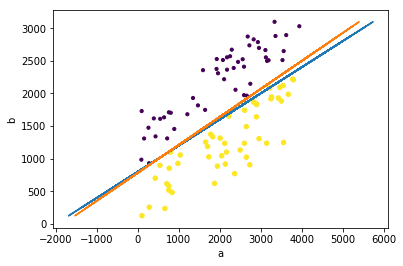

In [8]:
a_plot = (threshold - w2*b - bias) / w1
plt.plot(a_plot, b,)


a_plot = (0 - w_final[1]*b - b_final[0]) / w_final[0]
plt.plot(a_plot, b,)

plt.scatter(a, b, s=(y+1)*10, c=np.reshape(y,num_data)*2)

plt.xlabel('a')
plt.ylabel('b')

### tf

In [9]:
feature_a = tf.feature_column.numeric_column('a')
feature_b = tf.feature_column.numeric_column('b')
features = [feature_a, feature_b]

input_func = tf.estimator.inputs.numpy_input_fn( x={
                                                    'a': a,
                                                    'b': b
                                                 },
                                                 y=y,
                                                 batch_size=1000,
                                                 num_epochs=999999999,
                                                 shuffle=True)
optimizer = tf.train.AdamOptimizer(learning_rate=3)
model = tf.estimator.LinearClassifier(feature_columns=features, optimizer=optimizer)
model.train(input_fn=input_func,steps=5000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/sr/9k0jqkfs33q22ppyt_t7yjt9716826/T/tmpt0fxskcm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11740c048>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/sr/9k0jqkfs33q22ppyt_t7yjt9716

In [12]:
test_input_func = tf.estimator.inputs.numpy_input_fn(
    x={
    'a': a,
    'b': b
    },
    y=y,
    batch_size=1000,
    num_epochs=1000,
    shuffle=False)
eval_metrics = model.evaluate(input_fn=test_input_func,steps=1)
eval_metrics

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-18-04:13:40
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/sr/9k0jqkfs33q22ppyt_t7yjt9716826/T/tmpt0fxskcm/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-04-18-04:13:40
INFO:tensorflow:Saving dict for global step 5000: accuracy = 1.0, accuracy_baseline = 0.5, auc = 1.0, auc_precision_recall = 1.0, average_loss = 4.133619e-21, global_step = 5000, label/mean = 0.5, loss = 4.1336192e-18, prediction/mean = 0.5


{'accuracy': 1.0,
 'accuracy_baseline': 0.5,
 'auc': 1.0,
 'auc_precision_recall': 1.0,
 'average_loss': 4.133619e-21,
 'label/mean': 0.5,
 'loss': 4.1336192e-18,
 'prediction/mean': 0.5,
 'global_step': 5000}

In [14]:
var_names = tf.estimator.LinearClassifier.get_variable_names(model)
for name in var_names:
    var_value = tf.estimator.LinearClassifier.get_variable_value(model, name)
    print(name, var_value)
    
w_a = np.asscalar(tf.estimator.LinearClassifier.get_variable_value(model, 'linear/linear_model/a/weights'))
w_b = np.asscalar(tf.estimator.LinearClassifier.get_variable_value(model, 'linear/linear_model/b/weights'))
bias_pred = np.asscalar(tf.estimator.LinearClassifier.get_variable_value(model, 'linear/linear_model/bias_weights'))
print('weigth a :', w_a)
print('weigth b :', w_b)
print('weigth bias :', bias)

global_step 5000
linear/beta1_power 0.0
linear/beta2_power 0.006714833
linear/linear_model/a/weights [[0.9979142]]
linear/linear_model/a/weights/part_0/Adam [[1.0473857e-14]]
linear/linear_model/a/weights/part_0/Adam_1 [[5.4018166e+09]]
linear/linear_model/b/weights [[-2.2967792]]
linear/linear_model/b/weights/part_0/Adam [[7.9023956e-15]]
linear/linear_model/b/weights/part_0/Adam_1 [[3.0376256e+09]]
linear/linear_model/bias_weights [1816.3956]
linear/linear_model/bias_weights/part_0/Adam [4.141101e-18]
linear/linear_model/bias_weights/part_0/Adam_1 [889.1027]
weigth a : 0.99791419506073
weigth b : -2.296779155731201
weigth bias : 2


Text(0,0.5,'b')

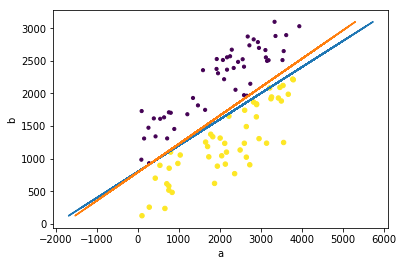

In [11]:
a_plot = (threshold - w2*b - bias) / w1
plt.plot(a_plot, b,)


a_plot = (0 - w_b*b - bias_pred) / w_a
plt.plot(a_plot, b,)

plt.scatter(a, b, s=(y+1)*10, c=np.reshape(y,100)*2)

plt.xlabel('a')
plt.ylabel('b')